In [1]:
import gym
from scipy.special import expit as sigmoid
import numpy as np
import numpy.random as npr
import time
from itertools import count
from collections import deque
import matplotlib.pyplot as plt
from a2c_ppo_acktr import utils

from layer import Layer

In [2]:
class args(object):
    num_hidden = 8
    bandwidth = 3
    eval_interval = None
    log_interval = 10
    use_gae = False
    num_updates = 1e5
    num_steps = 32
    clip_param = 0.2
    ppo_epoch = 4
    num_mini_batch = 32
    value_loss_coef = 0.5
    entropy_coef = 0.01
    lr = 1e-8
    eps = 1e-5
    max_grad_norm = 0.2
    gamma = 0.99
    gae_lambda = 0.95
    use_proper_time_limits = False

In [3]:
env = gym.make('CartPole-v0')
input = Layer(4, 1, args.bandwidth, post_width=args.num_hidden, args=args, post_process=None)
hidden = Layer(args.num_hidden, args.bandwidth, args.bandwidth, post_width=1, args=args, post_process=None)
output = Layer(1, args.bandwidth, 1, post_process=sigmoid, args=args)

/home/f1ery/.local/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [4]:
episode_rewards = deque(maxlen=10)
done = True

for j in count(1):
    input.clear_memory()
    hidden.clear_memory()
    output.clear_memory()
    if done:
        state = env.reset()
        episode_rewards.append(0)
    for unit in input.units + hidden.units + output.units:
        utils.update_linear_schedule(unit.agent.optimizer, j, args.num_updates, args.lr)
    for step in range(args.num_steps):
        action = output(hidden(input([state[i:i+1] for i in range(4)])))[0][0]
        action = int(action > 0.5)
        state, reward, done, info = env.step(action)
        episode_rewards[-1] += reward
        if done:
            input.done()
            hidden.done()
            output.done()
    input.update()
    hidden.update()
    output.update()
    print('Iter: %d, Avg/Max/Min. reward: %0.2f/%0.2f/%0.2f' % (j, sum(episode_rewards)/len(episode_rewards), max(episode_rewards), min(episode_rewards)))

/home/f1ery/.local/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Iter: 1, Avg/Max/Min. reward: 14.00/14.00/14.00
Iter: 2, Avg/Max/Min. reward: 13.00/14.00/12.00
Iter: 3, Avg/Max/Min. reward: 12.00/14.00/10.00
Iter: 4, Avg/Max/Min. reward: 14.75/23.00/10.00
Iter: 5, Avg/Max/Min. reward: 16.00/23.00/10.00
Iter: 6, Avg/Max/Min. reward: 15.83/23.00/10.00
Iter: 7, Avg/Max/Min. reward: 14.86/23.00/9.00
Iter: 8, Avg/Max/Min. reward: 14.75/23.00/9.00
Iter: 9, Avg/Max/Min. reward: 14.11/23.00/9.00
Iter: 10, Avg/Max/Min. reward: 15.90/32.00/9.00
Iter: 11, Avg/Max/Min. reward: 17.20/45.00/9.00
Iter: 12, Avg/Max/Min. reward: 19.00/45.00/9.00
Iter: 13, Avg/Max/Min. reward: 21.60/58.00/9.00
Iter: 14, Avg/Max/Min. reward: 22.10/58.00/9.00
Iter: 15, Avg/Max/Min. reward: 23.70/58.00/9.00
Iter: 16, Avg/Max/Min. reward: 22.50/58.00/9.00
Iter: 17, Avg/Max/Min. reward: 21.60/58.00/9.00
Iter: 18, Avg/Max/Min. reward: 21.60/58.00/9.00
Iter: 19, Avg/Max/Min. reward: 22.90/58.00/9.00
Iter: 20, Avg/Max/Min. reward: 24.70/58.00/9.00
Iter: 21, Avg/Max/Min. reward: 24.90/58.00/

Iter: 169, Avg/Max/Min. reward: 20.80/32.00/12.00
Iter: 170, Avg/Max/Min. reward: 21.50/32.00/12.00
Iter: 171, Avg/Max/Min. reward: 22.20/32.00/15.00
Iter: 172, Avg/Max/Min. reward: 20.50/30.00/15.00
Iter: 173, Avg/Max/Min. reward: 22.00/30.00/15.00
Iter: 174, Avg/Max/Min. reward: 21.00/30.00/15.00
Iter: 175, Avg/Max/Min. reward: 20.40/30.00/15.00
Iter: 176, Avg/Max/Min. reward: 21.20/30.00/15.00
Iter: 177, Avg/Max/Min. reward: 22.90/32.00/15.00
Iter: 178, Avg/Max/Min. reward: 24.20/45.00/15.00
Iter: 179, Avg/Max/Min. reward: 22.70/45.00/15.00
Iter: 180, Avg/Max/Min. reward: 22.20/45.00/13.00
Iter: 181, Avg/Max/Min. reward: 22.60/45.00/13.00
Iter: 182, Avg/Max/Min. reward: 24.30/49.00/13.00
Iter: 183, Avg/Max/Min. reward: 24.90/49.00/13.00
Iter: 184, Avg/Max/Min. reward: 25.10/49.00/13.00
Iter: 185, Avg/Max/Min. reward: 24.40/49.00/13.00
Iter: 186, Avg/Max/Min. reward: 23.80/49.00/9.00
Iter: 187, Avg/Max/Min. reward: 24.30/49.00/9.00
Iter: 188, Avg/Max/Min. reward: 24.90/49.00/9.00
Ite

KeyboardInterrupt: 

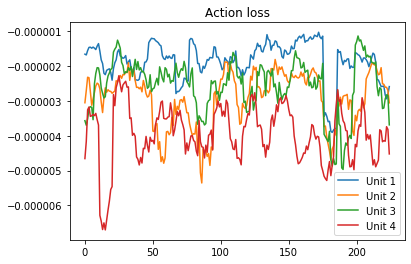

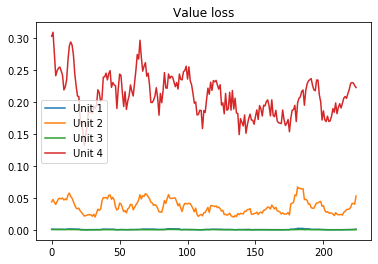

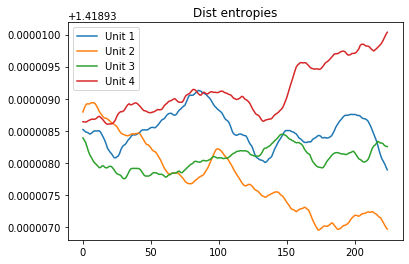

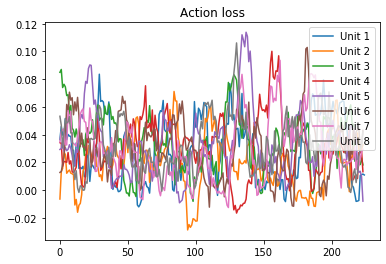

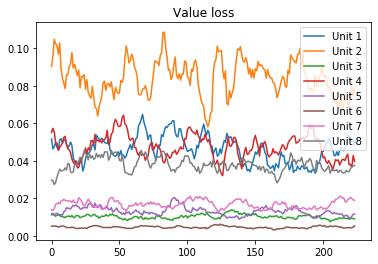

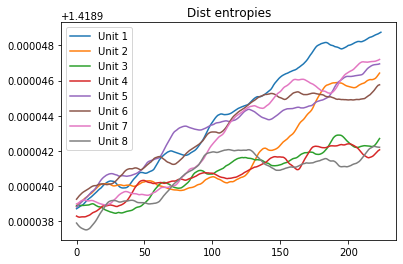

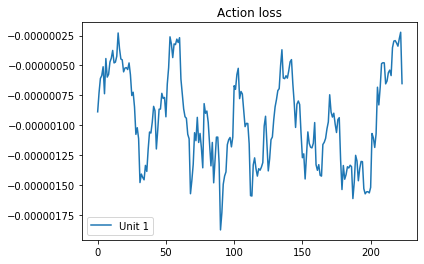

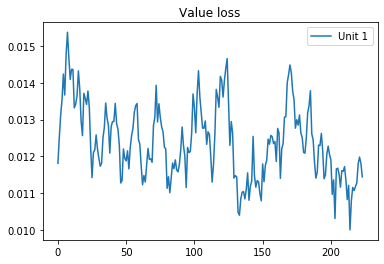

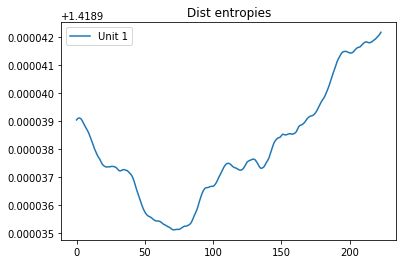

In [5]:
input.plot_stats(n=10)
hidden.plot_stats(n=10)
output.plot_stats(n=10)